In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [2]:
print(Qobj())

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]


In [3]:
x = np.array([[1, 2, 3, 4, 5]])
print(Qobj(x))

Quantum object: dims = [[1], [5]], shape = (1, 5), type = bra
Qobj data =
[[1. 2. 3. 4. 5.]]


In [4]:
r = np.random.rand(4, 4)
print(Qobj(r))

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.24387546 0.98136259 0.76847541 0.07540542]
 [0.9246351  0.69669751 0.49687903 0.44462508]
 [0.42576166 0.69042265 0.99954068 0.41659479]
 [0.05496964 0.23618249 0.17086667 0.9648364 ]]


In [5]:
print(qeye(5))

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [6]:
print(basis(4,1))

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]


In [7]:
print(coherent(5,2+2j))

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[ 0.18648519+0.j        ]
 [-0.2275717 -0.2275717j ]
 [ 0.        +0.60521843j]
 [ 0.22241544-0.22241544j]
 [-0.62961806+0.j        ]]


In [8]:
q=qeye(4)
print(q.diag())

[1. 1. 1. 1.]


In [9]:
psi = basis(2, 0)

rho = ket2dm(psi)

print(rho)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]


In [10]:
vec_rho = operator_to_vector(rho)

print(vec_rho)

Quantum object: dims = [[[2], [2]], [1]], shape = (4, 1), type = operator-ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]


In [11]:
rho2 = vector_to_operator(vec_rho)

np.testing.assert_almost_equal((rho - rho2).norm(), 0)

In [12]:
X = sigmax()

S = spre(X) * spost(X.dag())
print(S)

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [13]:
H = 10 * sigmaz()

c1 = destroy(2)

L = liouvillian(H, [c1])

print(L)

S = (12 * L).expm()


Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[ 0.  +0.j  0.  +0.j  0.  +0.j  1.  +0.j]
 [ 0.  +0.j -0.5+20.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j -0.5-20.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j -1.  +0.j]]


In [14]:
s = qeye(3)
s.dims

[[3], [3]]

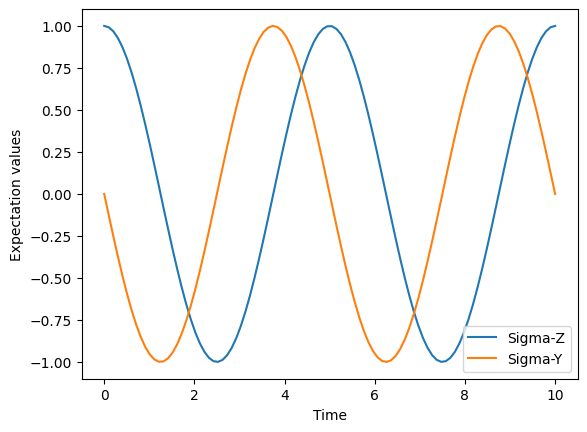

In [15]:
H = 2*np.pi * 0.1 * sigmax()
psi0 = basis(2, 0)
times = np.linspace(0.0, 10.0, 100)
result = sesolve(H, psi0, times, [sigmaz(), sigmay()])
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 
ax.plot(result.times, result.expect[1]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y")) 
plt.show() 

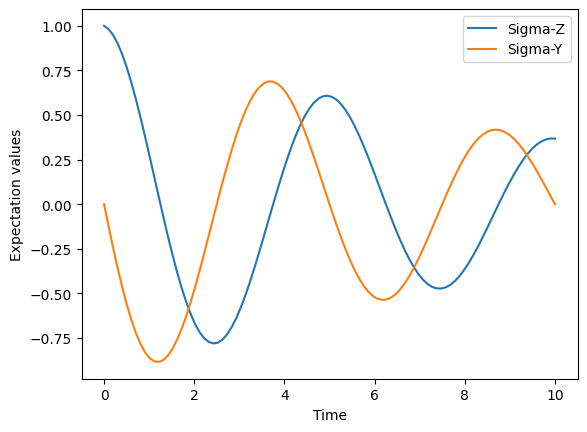

In [16]:
times = np.linspace(0.0, 10.0, 100)
result = mesolve(H, psi0, times, [np.sqrt(0.05) * sigmax()], [sigmaz(), sigmay()])
fig, ax = plt.subplots()
ax.plot(times, result.expect[0]) 
ax.plot(times, result.expect[1]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y"))  
plt.show()

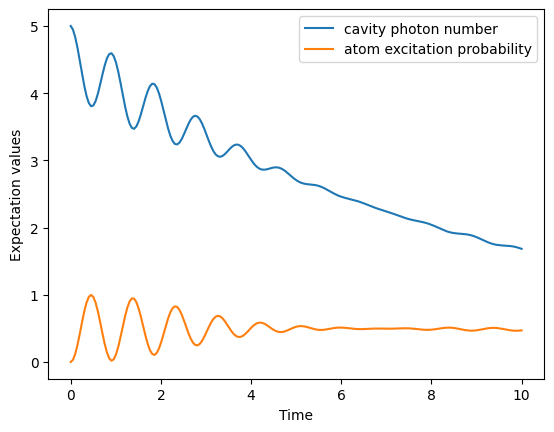

In [17]:
times = np.linspace(0.0, 10.0, 200)
psi0 = tensor(fock(2,0), fock(10, 5))
a  = tensor(qeye(2), destroy(10))
sm = tensor(destroy(2), qeye(10))
H = 2 * np.pi * a.dag() * a + 2 * np.pi * sm.dag() * sm + 2 * np.pi * 0.25 * (sm * a.dag() + sm.dag() * a)
result = mesolve(H, psi0, times, [np.sqrt(0.1)*a], [a.dag()*a, sm.dag()*sm])
plt.figure() 
plt.plot(times, result.expect[0]) 
plt.plot(times, result.expect[1]) 
plt.xlabel('Time') 
plt.ylabel('Expectation values') 
plt.legend(("cavity photon number", "atom excitation probability")) 
plt.show() 

In [18]:
#Equations for the van der pol oscillator
from math import *

psi0 = fock(3,0) #oscillator state

#coupling values
k1 = 0.01  #one photon linear gain rate
k2 = 1  #non-linear two photon loss rate
k3 = 0.02 #one photon linear loss rate

#operators for system 

a = destroy(3)
a_sq = a**2

c_ops = []  # Build collapse operators
c_ops.append(np.sqrt(k1) * a.dag())
c_ops.append(np.sqrt(k2) * a_sq) 
c_ops.append(np.sqrt(k3) * a)

t = np.linspace(0, 100, 1000) # Define time vector


#hamiltonian for system with h_bar = 1
f_0 = 2
w_r = 40 #lamb shifted resonator frequency
w_d = 39 #drive frequency
H0 = w_r*a.dag()*a
H1 = f_0*a.dag()
H2 = f_0*a


In [19]:
def coeff1(t, args):
    return np.exp(-1j*w_d *t)

def coeff2(t, args):
    return np.exp(1j*w_d *t)

D:\Anaconda\envs\firstenv\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


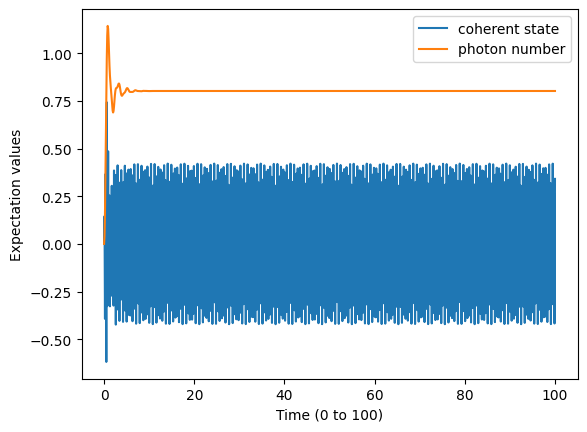

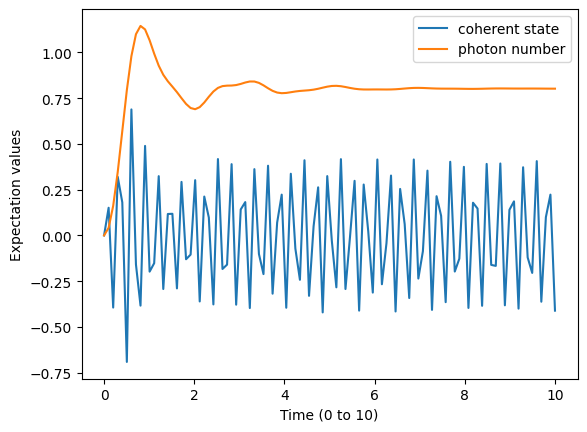

In [20]:
H = [H0,[H1,coeff1],[H2,coeff2]]
result = mesolve(H, psi0, t, c_ops, [a, a.dag()*a])

#plotting results

plt.figure(0) 
plt.plot(t, result.expect[0]) 
plt.plot(t, result.expect[1]) 
plt.xlabel('Time (0 to 100)') 
plt.ylabel('Expectation values') 
plt.legend(("coherent state", "photon number")) 

plt.figure(1)
t2 = np.linspace(0,10,100)

result2 = mesolve(H, psi0, t2, c_ops, [a, a.dag()*a])
plt.plot(t2, result2.expect[0]) 
plt.plot(t2, result2.expect[1]) 
plt.xlabel('Time (0 to 10)') 
plt.ylabel('Expectation values') 
plt.legend(("coherent state", "photon number")) 

plt.show()

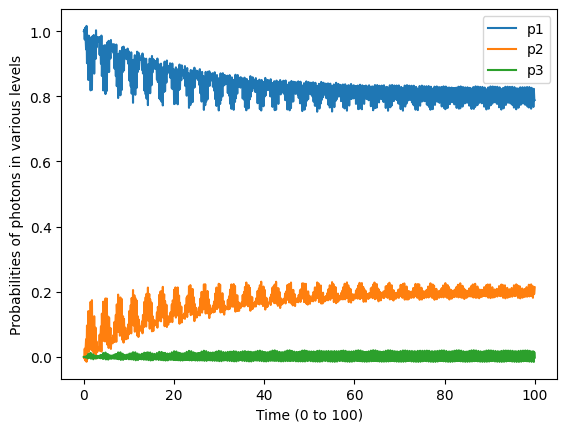

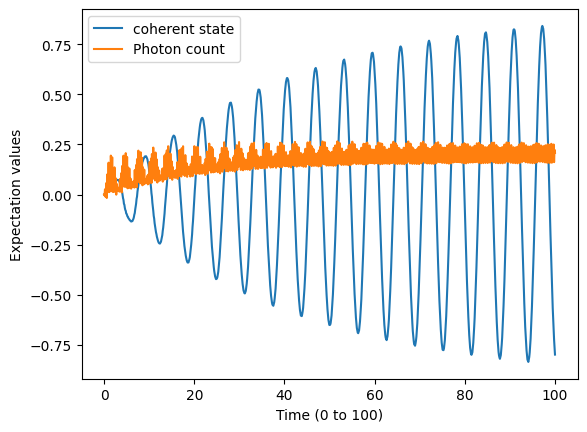

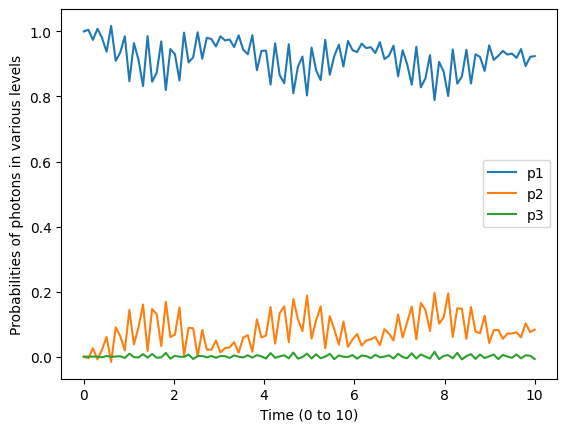

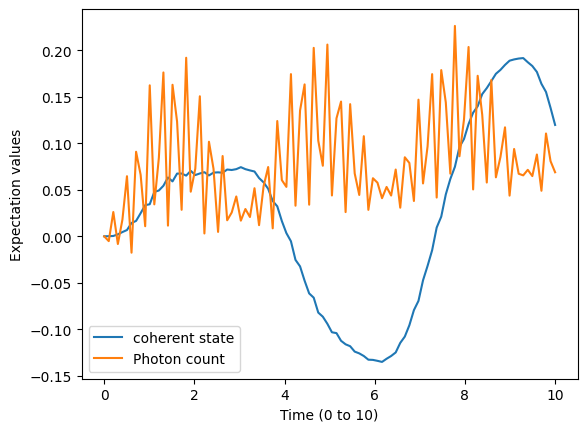

In [21]:
#In interaction picture, we take deturned values of frequency via RWA. The equations become simpler to write

delta = w_r - w_d #detuning value

#projection operators
one = fock(3,0)*fock(3,0).dag()
two = fock(3,1)*fock(3,1).dag()
three = fock(3,2)*fock(3,2).dag()

h_0 = delta*a.dag()*a
def coeff3 (t, args):
    return np.exp(1j*delta *t)

def coeff4(t, args):
    return np.exp(-1j*w_d *t)

h_int = [h_0,[H1,coeff3],[H2,coeff4]]

result_int = mesolve(h_int, psi0, t, c_ops, [a, a.dag()*a,one,two,three])

plt.figure(0) 
plt.plot(t, result_int.expect[2]) 
plt.plot(t, result_int.expect[3])
plt.plot(t, result_int.expect[4]) 
plt.xlabel('Time (0 to 100)') 
plt.ylabel('Probabilities of photons in various levels') 
plt.legend(("p1", "p2", "p3"))


plt.figure(1)
plt.plot(t, result_int.expect[0]) 
plt.plot(t, result_int.expect[1])

plt.xlabel('Time (0 to 100)') 
plt.ylabel('Expectation values') 
plt.legend(("coherent state", "Photon count"))

result_int_2 = mesolve(h_int, psi0, t2, c_ops, [a, a.dag()*a,one,two,three])

plt.figure(2) 
plt.plot(t2, result_int_2.expect[2]) 
plt.plot(t2, result_int_2.expect[3])
plt.plot(t2, result_int_2.expect[4]) 
plt.xlabel('Time (0 to 10)') 
plt.ylabel('Probabilities of photons in various levels') 
plt.legend(("p1", "p2", "p3"))


plt.figure(3)
plt.plot(t2, result_int_2.expect[0]) 
plt.plot(t2, result_int_2.expect[1])

plt.xlabel('Time (0 to 10)') 
plt.ylabel('Expectation values') 
plt.legend(("coherent state", "Photon count"))

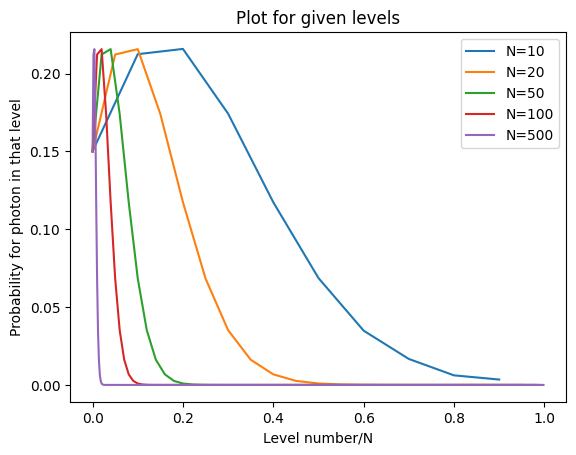

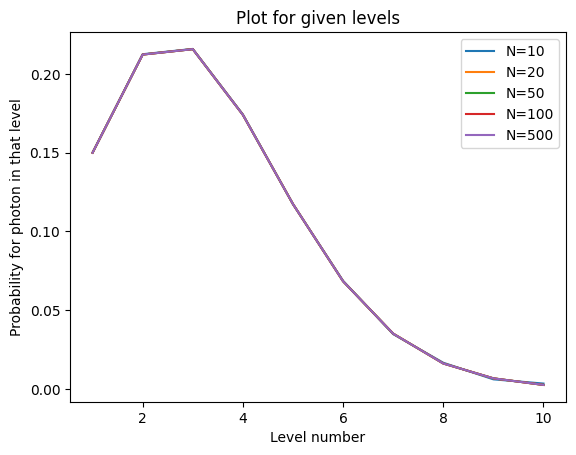

In [22]:
#Start of the markov chain , indexing goes as 0,1,2,....N-1


def solver(N,k1=1,k2=0.2,k3=0.3):
    #firstly form the matrix
    A,B = [],[]
    B.append([1]) #for sum to 1
    for i in range(N-1):
        B.append([0])
    A.append([1]*N) 
    A.append([k1,-k3,-2*k2]+[0]*(N-3)) #2nd row
    for i in range(3,N):
        A.append([0]*(i-3) + [k1*(i-2),-k1*(i-1)-k2*(i-3)*(i-2)-k3*(i-2),k3*(i-1),k2*i*(i-1)] + [0]*(N-i-1)) #adding rows from 3 to n-2
    A.append([0]*(N-3) + [k1*(N-2),(-k1*(N-1)-k2*(N-3)*(N-2)-k3*(N-2))+(((N-1)**2)*k1*k3/(N*k1+(N-1)*(N-2)*k2+(N-1)*k3))] + [0]) #n-1th row
    #A.append([0]*(N-2) + [k1*N,-k1*(N+1)-k2*N*(N-1)-k3*N]) #nth row
    
    A = np.array(A)
    B = np.array(B)
    
    
    #print(A)
    #print(B)
    
    X = np.linalg.inv(A).dot(B) #solution for 
    X = X.tolist()
    #print(X)
    y =[]
    for i in X:
        y.append(i[0])
    #print(y)
    x = np.arange(N)/N
    #print(x)
    
    
    return x,y
    
#plot all the probabilities

x1,y1 = solver(10)
x2,y2 = solver(20)
x3,y3 = solver(50)
x4,y4 = solver(100)
x5,y5 = solver(500)

plt.figure(0) #normalised x-axis
    
plt.title(f"Plot for given levels") 
plt.xlabel("Level number/N")
plt.ylabel("Probability for photon in that level") 
plt.plot(x1,y1) 
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)
plt.legend(["N=10","N=20","N=50","N=100","N=500"])
plt.show()

x = np.arange(1,11)

plt.figure(1)

plt.title(f"Plot for given levels") 
plt.xlabel("Level number") 
plt.ylabel("Probability for photon in that level") 
plt.plot(x,y1) 
plt.plot(x,y2[0:10])
plt.plot(x,y3[0:10])
plt.plot(x,y4[0:10])
plt.plot(x,y5[0:10])
plt.legend(["N=10","N=20","N=50","N=100","N=500"])
plt.show()

    

    
  

'plt.title("Plot of entropy production rate") \nplt.xlabel("k1") \nplt.ylabel("Entropy production rate") \nplt.plot(k1,rate_list_0(20))'

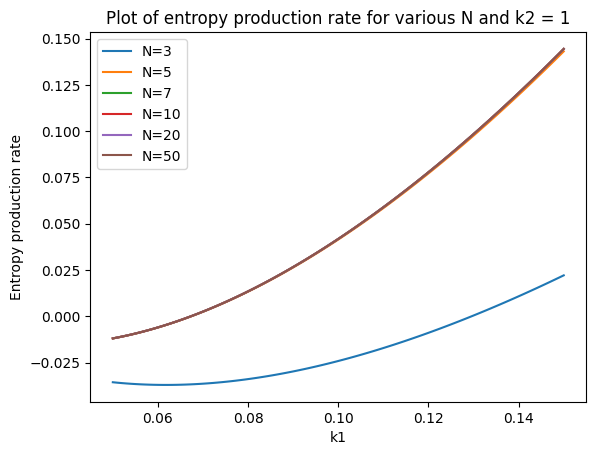

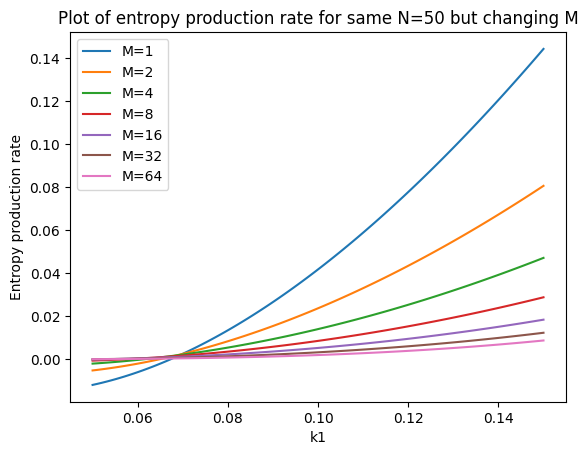

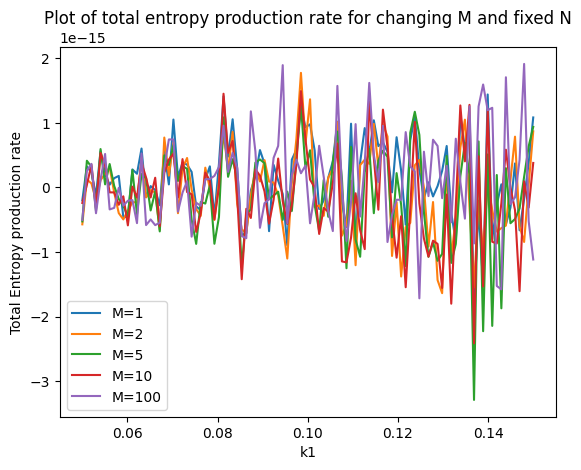

In [23]:
#Defining net probability current taking n-1,n,n+1,n+2

def prob_curr_1(n,ph,pl,k1,k3): #defined between neighbouring levels
    return 2*(k3*(n+1)*ph - k1*(n+1)*pl)

def prob_curr_2(n,ph,pl,k2):
    return 2*k2*((n+1)*(n+2)*ph)  #Outgoing rate = 0

"""def prob_curr_3(n,ph,pl,k3):
    return 2*k3*((n+1)*ph - n*pl)"""

#Entropy production rate
def entropy_rate(N,k1=1,k2=1,k3=0.1):
    S=0
    x,y = solver(N,k1,k2,k3)
    for i in range (N-2):
        #print(y[i])
        S+=(prob_curr_1(i,y[i+1],y[i],k1,k3)*np.log(abs(y[i+1]*k3)/abs(y[i]*k1)))/2
        S+=(prob_curr_2(i,y[i+2],y[i],k2)*np.log(abs(y[i+2]*(i+2)*(i+1))/abs(y[i])))/2
        #S+=-(prob_curr_3(i,y[i],y[i-1],k3)*np.log((y[i-1]*i)/(y[i]*(i+1))))/2
    S+=(prob_curr_1(i,y[N-1],y[N-2],k1,k3)*np.log(abs(y[N-1]*k3)/abs(y[N-2]*k1)))/2
    return S

def entropy_rate_total(N,k1=1,k2=1,k3=0.1):
    S=0
    x,y = solver(N,k1,k2,k3)
    for i in range (N-2):
        #print(y[i])
        S+=-(prob_curr_1(i,y[i+1],y[i],k1,k3)*np.log(abs(y[i+1]/y[i])))/2
        S+=-(prob_curr_2(i,y[i+2],y[i],k2)*np.log(abs(y[i+2]/y[i])))/2
        #S+=-(prob_curr_3(i,y[i],y[i-1],k3)*np.log(y[i-1]/y[i]))/2
    S+=(prob_curr_1(i,y[N-1],y[N-2],k1,k3)*np.log(abs(y[N-1]/y[N-2])))/2
    return S

#Plotting the entropy for range of k1 and having a different parameter M
k1 = np.linspace(0.05,0.15,100)
def rate_list(N,M):
    rate_list=[]
    for i in k1:
        rate_list.append(entropy_rate(N,i,1/M)/M)
    return rate_list

def rate_list_0(N):
    rate_list=[]
    for i in k1:
        rate_list.append(entropy_rate(N,i))
    return rate_list


def rate_list_1(N,M):
    rate_list=[]
    for i in k1:
        rate_list.append(entropy_rate_total(N,i,1/M))
    return rate_list

plt.figure(0)

plt.title("Plot of entropy production rate for various N and k2 = 1") 
plt.xlabel("k1") 
plt.ylabel("Entropy production rate") 
plt.plot(k1,rate_list(3,1))
plt.plot(k1,rate_list(5,1))
plt.plot(k1,rate_list(7,1))
plt.plot(k1,rate_list(10,1))
plt.plot(k1,rate_list(20,1))
plt.plot(k1,rate_list(50,1))
#plt.plot(k1,rate_list(1000))
plt.legend(["N=3","N=5","N=7","N=10","N=20","N=50"])

plt.figure(1)
plt.title("Plot of entropy production rate for same N=50 but changing M") 
plt.xlabel("k1") 
plt.ylabel("Entropy production rate") 
plt.plot(k1,rate_list(50,1))
plt.plot(k1,rate_list(50,2))
plt.plot(k1,rate_list(50,4))
plt.plot(k1,rate_list(50,8))
plt.plot(k1,rate_list(50,16))
plt.plot(k1,rate_list(50,32))
plt.plot(k1,rate_list(50,64))

#plt.plot(k1,rate_list(1000))
plt.legend(["M=1","M=2","M=4","M=8","M=16","M=32","M=64"])

"""plt.figure(2)
plt.title("Plot of total entropy production rate for changing N and k2 = 1") 
plt.xlabel("k1") 
plt.ylabel("Total Entropy production rate") 
plt.plot(k1,rate_list_1(3,1))
plt.plot(k1,rate_list_1(5,1))
plt.plot(k1,rate_list_1(7,1))
plt.plot(k1,rate_list_1(10,1))
plt.plot(k1,rate_list_1(20,1))
plt.plot(k1,rate_list_1(50,1))
#plt.plot(k1,rate_list(1000))
plt.legend(["N=3","N=5","N=7","N=10","N=20","N=50"])"""

plt.figure(3)
plt.title("Plot of total entropy production rate for changing M and fixed N") 
plt.xlabel("k1") 
plt.ylabel("Total Entropy production rate") 
plt.plot(k1,rate_list_1(50,1))
plt.plot(k1,rate_list_1(50,2))
plt.plot(k1,rate_list_1(50,5))
plt.plot(k1,rate_list_1(50,10))
plt.plot(k1,rate_list_1(50,100))
#plt.plot(k1,rate_list(1000))
plt.legend(["M=1","M=2","M=5","M=10","M=100"])


"""plt.title("Plot of entropy production rate") 
plt.xlabel("k1") 
plt.ylabel("Entropy production rate") 
plt.plot(k1,rate_list_0(20))"""



        

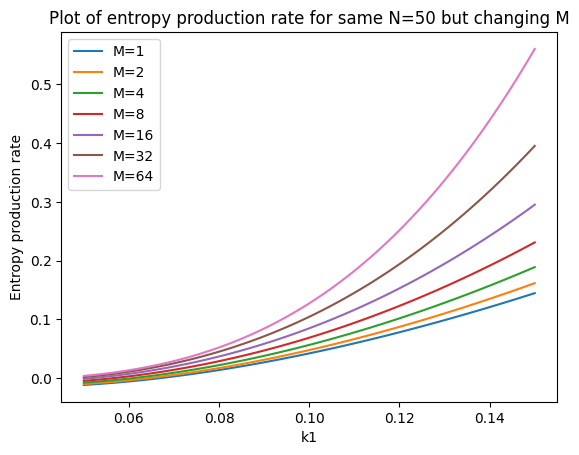

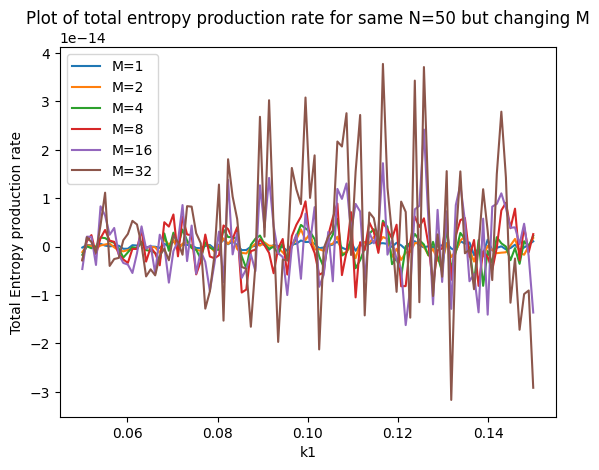

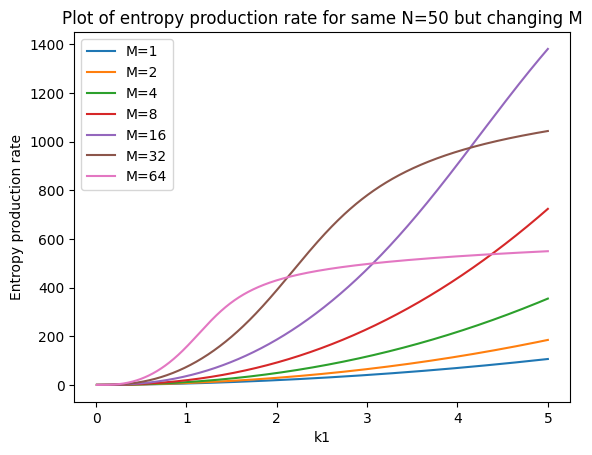

In [39]:
#defining new parametrisation Mk1,k2=1,Mk3

k1 = np.linspace(0.05,0.15,100)
k3 = 0.1

def rate_list_2(N,M,k1):
    rate_list=[]
    for i in k1:
        rate_list.append(entropy_rate(N,M*i,1,M*k3)/M)
    return rate_list

def rate_list_3(N,M,k1):
    rate_list=[]
    for i in k1:
        rate_list.append(entropy_rate_total(N,M*i,1,M*k3))
    return rate_list


plt.figure(0)  
plt.title("Plot of entropy production rate for same N=50 but changing M") 
plt.xlabel("k1") 
plt.ylabel("Entropy production rate") 
plt.plot(k1,rate_list_2(50,1,k1))
plt.plot(k1,rate_list_2(50,2,k1))
plt.plot(k1,rate_list_2(50,4,k1))
plt.plot(k1,rate_list_2(50,8,k1))
plt.plot(k1,rate_list_2(50,16,k1))
plt.plot(k1,rate_list_2(50,32,k1))
plt.plot(k1,rate_list_2(50,64,k1))

plt.legend(["M=1","M=2","M=4","M=8","M=16","M=32","M=64"])

plt.figure(1)  
plt.title("Plot of total entropy production rate for same N=50 but changing M") 
plt.xlabel("k1") 
plt.ylabel("Total Entropy production rate") 
plt.plot(k1,rate_list_3(50,1,k1))
plt.plot(k1,rate_list_3(50,2,k1))
plt.plot(k1,rate_list_3(50,4,k1))
plt.plot(k1,rate_list_3(50,8,k1))
plt.plot(k1,rate_list_3(50,16,k1))
plt.plot(k1,rate_list_3(50,32,k1))
#plt.plot(k1,rate_list_3(50,64,k1))

plt.legend(["M=1","M=2","M=4","M=8","M=16","M=32","M=64"])


k1_0 = np.linspace(0.01,5,1000)
plt.figure(2)  
plt.title("Plot of entropy production rate for same N=50 but changing M") 
plt.xlabel("k1") 
plt.ylabel("Entropy production rate") 
plt.plot(k1_0,rate_list_2(50,1,k1_0))
plt.plot(k1_0,rate_list_2(50,2,k1_0))
plt.plot(k1_0,rate_list_2(50,4,k1_0))
plt.plot(k1_0,rate_list_2(50,8,k1_0))
plt.plot(k1_0,rate_list_2(50,16,k1_0))
plt.plot(k1_0,rate_list_2(50,32,k1_0))
plt.plot(k1_0,rate_list_2(50,64,k1_0))

plt.legend(["M=1","M=2","M=4","M=8","M=16","M=32","M=64"])
